In [40]:
# import data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

#import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import altair as altair
sns.set_style('whitegrid') # or 'darkgrid'

#import stats/regression packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook
%matplotlib inline
%config InlineBackend.figure_format ='retina'
#fig = plt.figure(figsize=(10,6))


ImportError: No module named altair

In [24]:
df = pd.read_stata("/Users/jmaller/Desktop/ECON628-01-rjmaller/datasets/my_data/replication_data_village_incident.dta")


In [ ]:
#Show variable types
df.dtypes

In [6]:
#Check for balanced panel data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15600 entries, 0 to 15599
Data columns (total 22 columns):
province           15600 non-null object
municipality       15600 non-null object
barangay           15600 non-null float32
year               15600 non-null float32
month              15600 non-null float32
treat              15600 non-null float32
pop00              15600 non-null float32
streetpattern      15600 non-null float32
power              15600 non-null float32
comm_waterworks    15600 non-null float32
hospital           15600 non-null float32
clinic             15600 non-null float32
acc_natl_hwy       15600 non-null float32
incidents          15600 non-null float64
treat_dist_3       15600 non-null float64
treat_dist_5       15600 non-null float64
treat_dist_7       15600 non-null float64
control_dist_3     15600 non-null float64
control_dist_5     15600 non-null float64
control_dist_7     15600 non-null float64
totcas             15600 non-null float64
_merge     

In [41]:
#Examining the first 5 lines of my dataset
df.head(5)

,province,municipality,barangay,year,month,treat,pop00,streetpattern,power,comm_waterworks,...,acc_natl_hwy,incidents,treat_dist_3,treat_dist_5,treat_dist_7,control_dist_3,control_dist_5,control_dist_7,totcas,_merge
0,Lanao Del Norte,Lala,1.0,2001.0,1.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
1,Lanao Del Norte,Lala,1.0,2001.0,2.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
2,Lanao Del Norte,Lala,1.0,2001.0,3.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
3,Lanao Del Norte,Lala,1.0,2001.0,4.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)
4,Lanao Del Norte,Lala,1.0,2001.0,5.0,0.0,2496.0,1.0,1.0,0.0,...,1.0,0.0,6.0,9.0,15.0,1.0,5.0,13.0,0.0,master only (1)


In [25]:
#Transposing the table makes it easier to visualize summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
barangay,15600.0,65.500000,37.524776,1.0,33.00,65.5,98.00,130.0
year,15600.0,2005.453125,2.872634,2001.0,2003.00,2005.5,2008.00,2010.0
month,15600.0,6.500000,3.452163,1.0,3.75,6.5,9.25,12.0
treat,15600.0,0.500000,0.500016,0.0,0.00,0.5,1.00,1.0
pop00,15600.0,1446.995850,1262.891602,183.0,659.00,1137.5,1757.00,10015.0
streetpattern,15600.0,0.269231,0.443581,0.0,0.00,0.0,1.00,1.0
power,15600.0,0.607692,0.488285,0.0,0.00,1.0,1.00,1.0
comm_waterworks,15600.0,0.161538,0.368056,0.0,0.00,0.0,0.00,1.0
hospital,15600.0,0.038462,0.192296,0.0,0.00,0.0,0.00,1.0
clinic,15600.0,0.476923,0.499511,0.0,0.00,0.0,1.00,1.0


In [26]:
#summary table showing mean number of incidents and mean number of total casualties for treatment and control groups
df.groupby(['treat'], sort=True)[['incidents', 'totcas']].mean().sort_values(by=['incidents'], ascending=False).reset_index()

,treat,incidents,totcas
0,0.0,0.006538,0.001154
1,1.0,0.006538,0.003718


In [27]:
#balancing table showing mean value of control variables for treatment and control groups
df.groupby(['treat'], sort=True)[['pop00', 'streetpattern', 'power', 'comm_waterworks', 'hospital', 'clinic', 'acc_natl_hwy']].mean().sort_values(by=['pop00'], ascending=False).reset_index()


,treat,pop00,streetpattern,power,comm_waterworks,hospital,clinic,acc_natl_hwy
0,1.0,1474.584595,0.215385,0.553846,0.169231,0.030769,0.461538,0.476923
1,0.0,1419.492310,0.323077,0.661538,0.153846,0.046154,0.492308,0.523077


In [21]:
#balancing table showing mean value of control variables for treatment and control groups (sorted by municipality)
df.groupby(['municipality','treat'], sort=True)[['pop00', 'streetpattern', 'power', 'comm_waterworks', 'hospital', 'clinic', 'acc_natl_hwy']].mean().reset_index()



,municipality,treat,pop00,streetpattern,power,comm_waterworks,hospital,clinic,acc_natl_hwy
0,Basay,0.0,2730.800049,0.400000,0.800000,0.400000,0.000000,1.000000,0.800000
1,Basay,1.0,1542.400024,0.000000,0.000000,0.600000,0.000000,0.800000,0.400000
2,Jimalalud,0.0,1037.307739,0.230769,0.230769,0.000000,0.076923,0.153846,0.769231
3,Jimalalud,1.0,884.733337,0.000000,0.333333,0.000000,0.000000,0.266667,0.533333
4,Lala,0.0,1434.928589,0.357143,1.000000,0.071429,0.000000,0.714286,0.642857
5,Lala,1.0,2796.769287,0.384615,1.000000,0.076923,0.076923,0.769231,0.923077
6,Paluan,0.0,1048.500000,0.833333,1.000000,0.000000,0.000000,0.666667,0.000000
7,Paluan,1.0,955.333313,0.833333,0.666667,0.000000,0.000000,0.500000,0.000000
8,Paracelis,0.0,1892.800049,0.200000,0.600000,0.000000,0.000000,0.000000,0.400000
9,Paracelis,1.0,2380.250000,0.250000,0.500000,0.000000,0.250000,0.250000,0.500000


In [42]:
#Using a mask to generate the mean of variables for a specific year
mask_2002=df['year']== 2002
df_2002=df[mask_2002]
df_2002.mean()

barangay             65.500000
year               2002.000000
month                 6.500000
treat                 0.500000
pop00              1447.038462
streetpattern         0.269231
power                 0.607692
comm_waterworks       0.161538
hospital              0.038462
clinic                0.476923
acc_natl_hwy          0.500000
incidents             0.001923
treat_dist_3          2.730769
treat_dist_5          5.646154
treat_dist_7          8.046154
control_dist_3        2.530769
control_dist_5        5.184615
control_dist_7        7.446154
totcas                0.000641
dtype: float64

In [60]:
#Identify which years and which municipalities had the greatest number of incidents
def maxi(df_a,category):
    mxm = df_a['year','municipality',category].groupby(['year','municipality'])
    mxm = mxm.sum().reset_index().sort_values(by = category, ascending = False).head(1)
    return mxm # Send to Javi for help

In [66]:
maxi(df, 'incidents') #Send to Javi for help

KeyError: ('year', 'municipality', 'incidents')

In [53]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

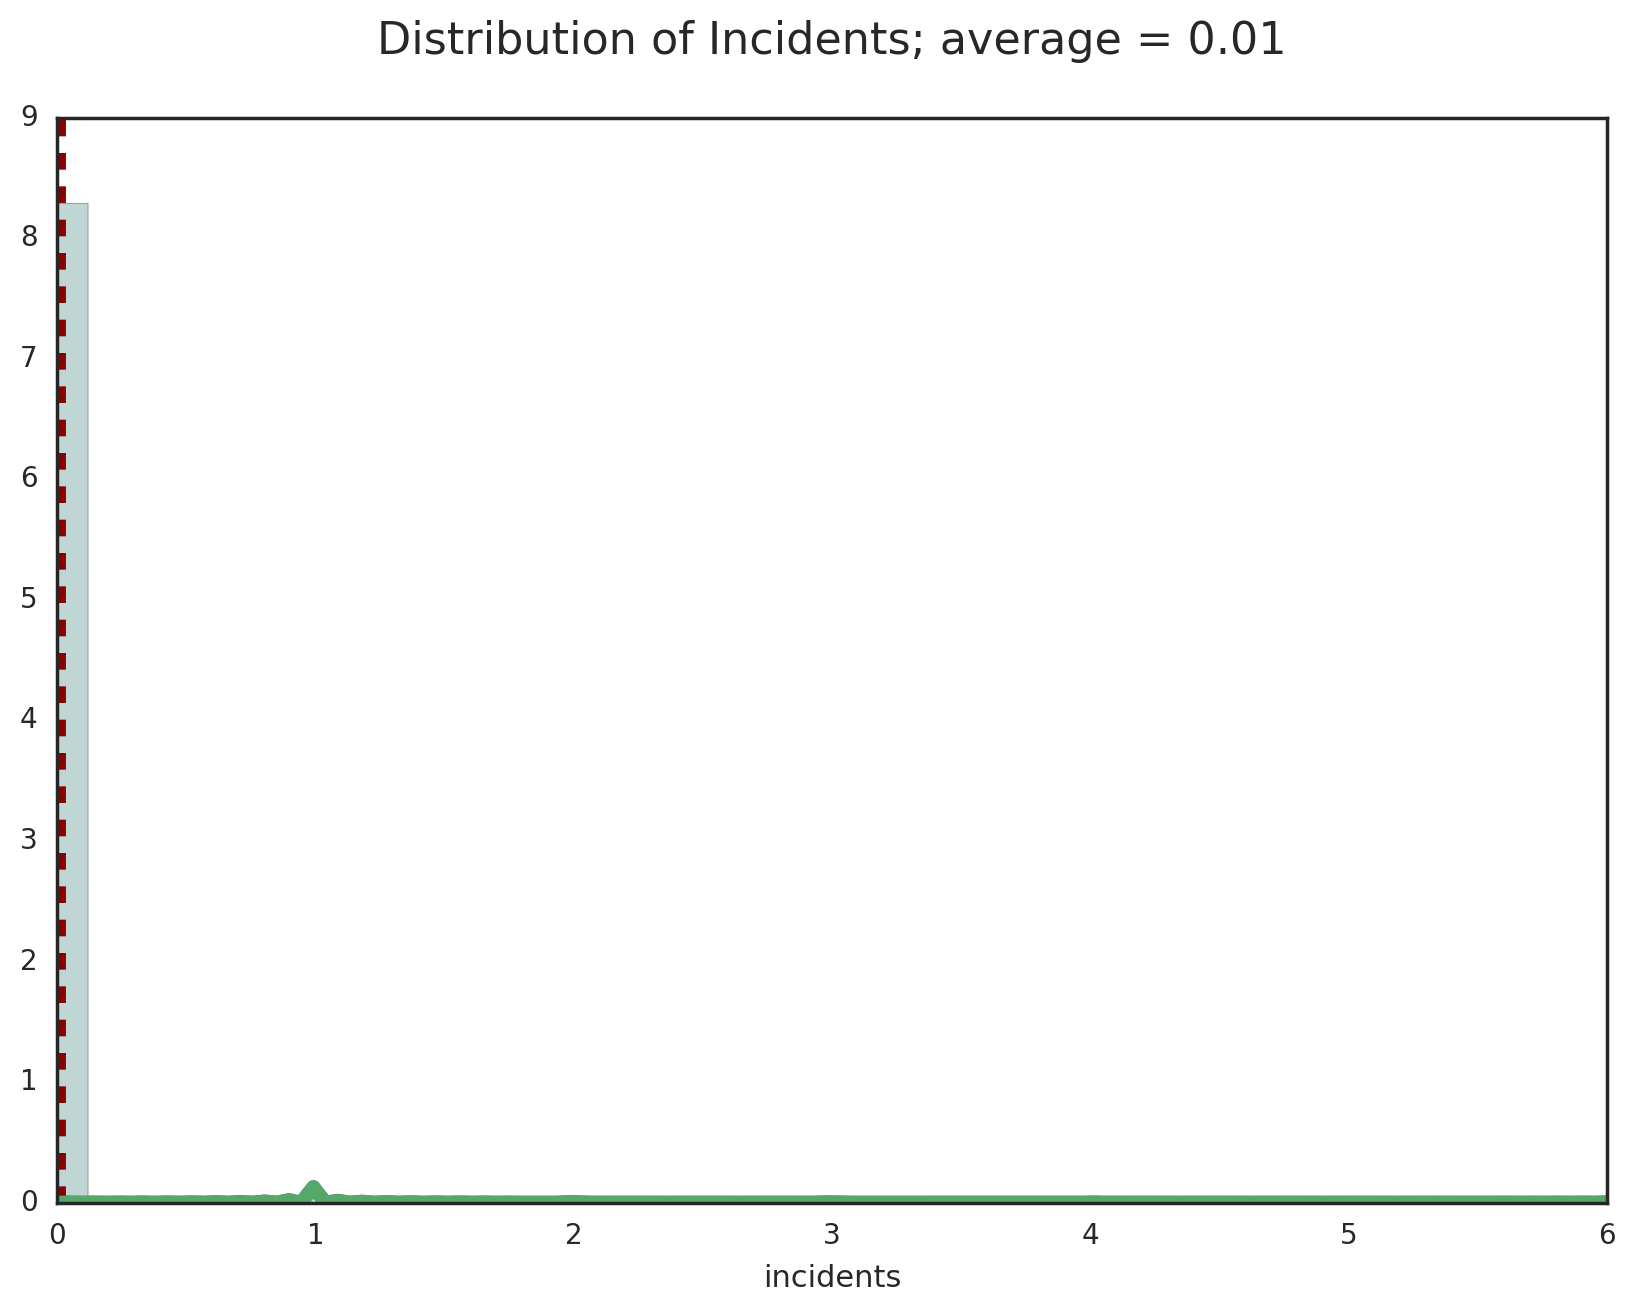

In [54]:
histogram_plotter("Incidents", df.incidents)


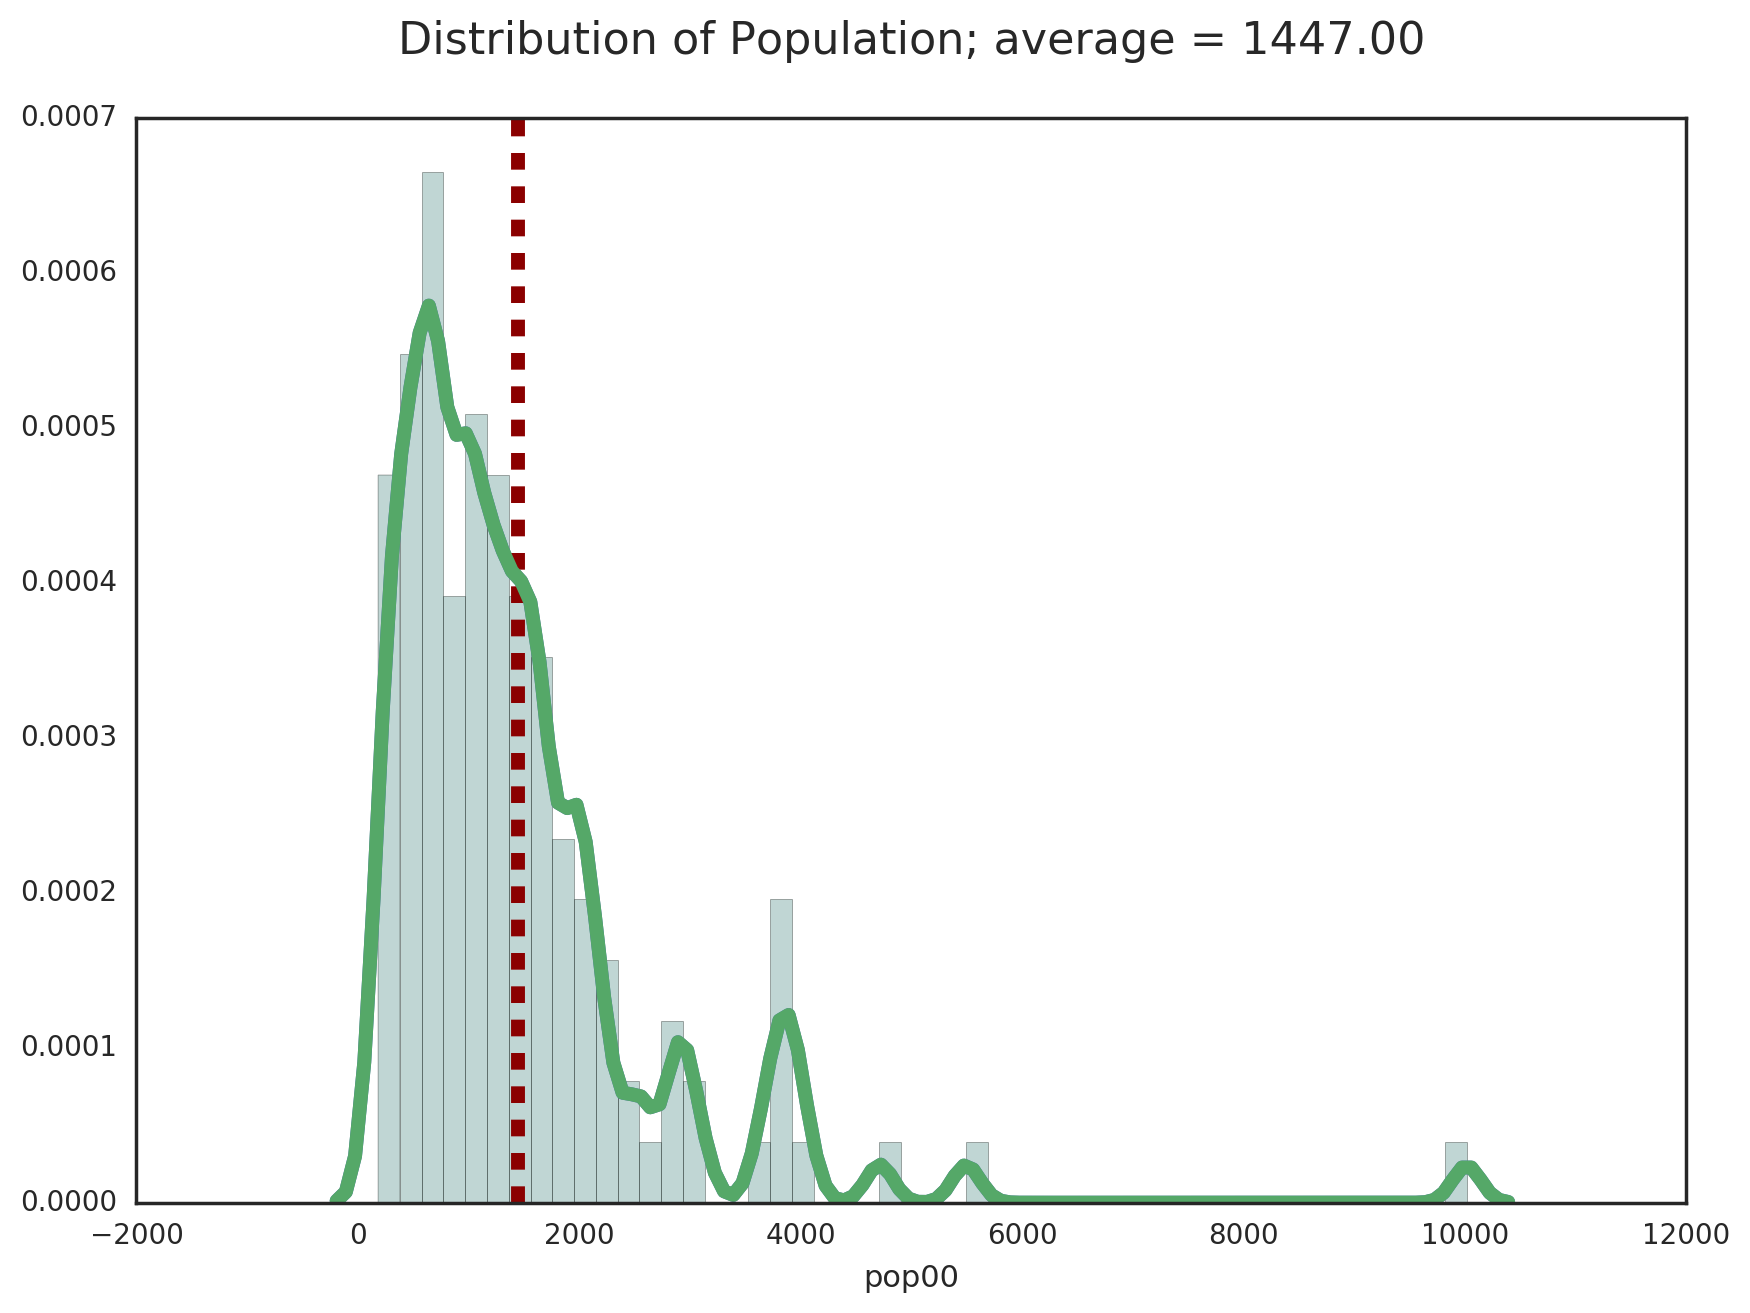

In [12]:
histogram_plotter("Population", df.pop00)
# The distribution of village population is skewed to the right. 


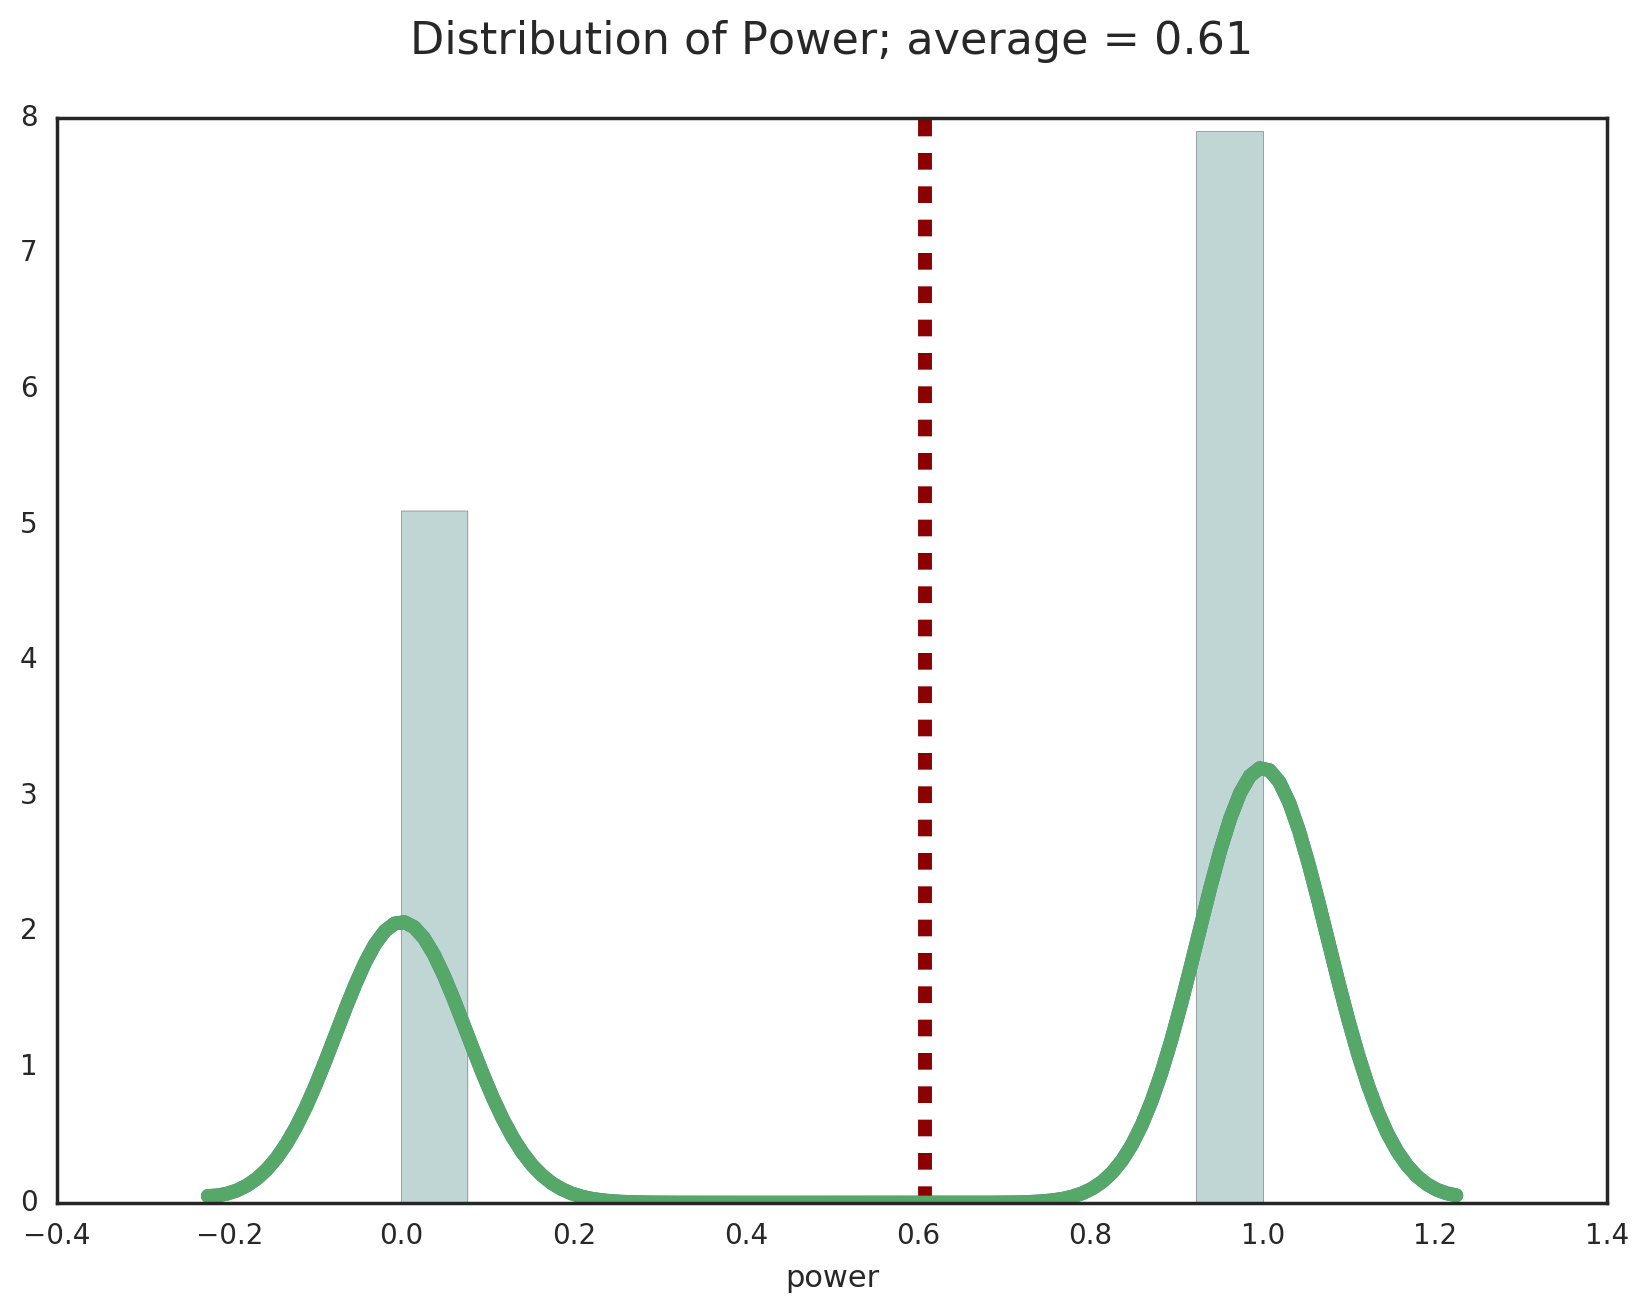

In [13]:
histogram_plotter("Power", df.power)


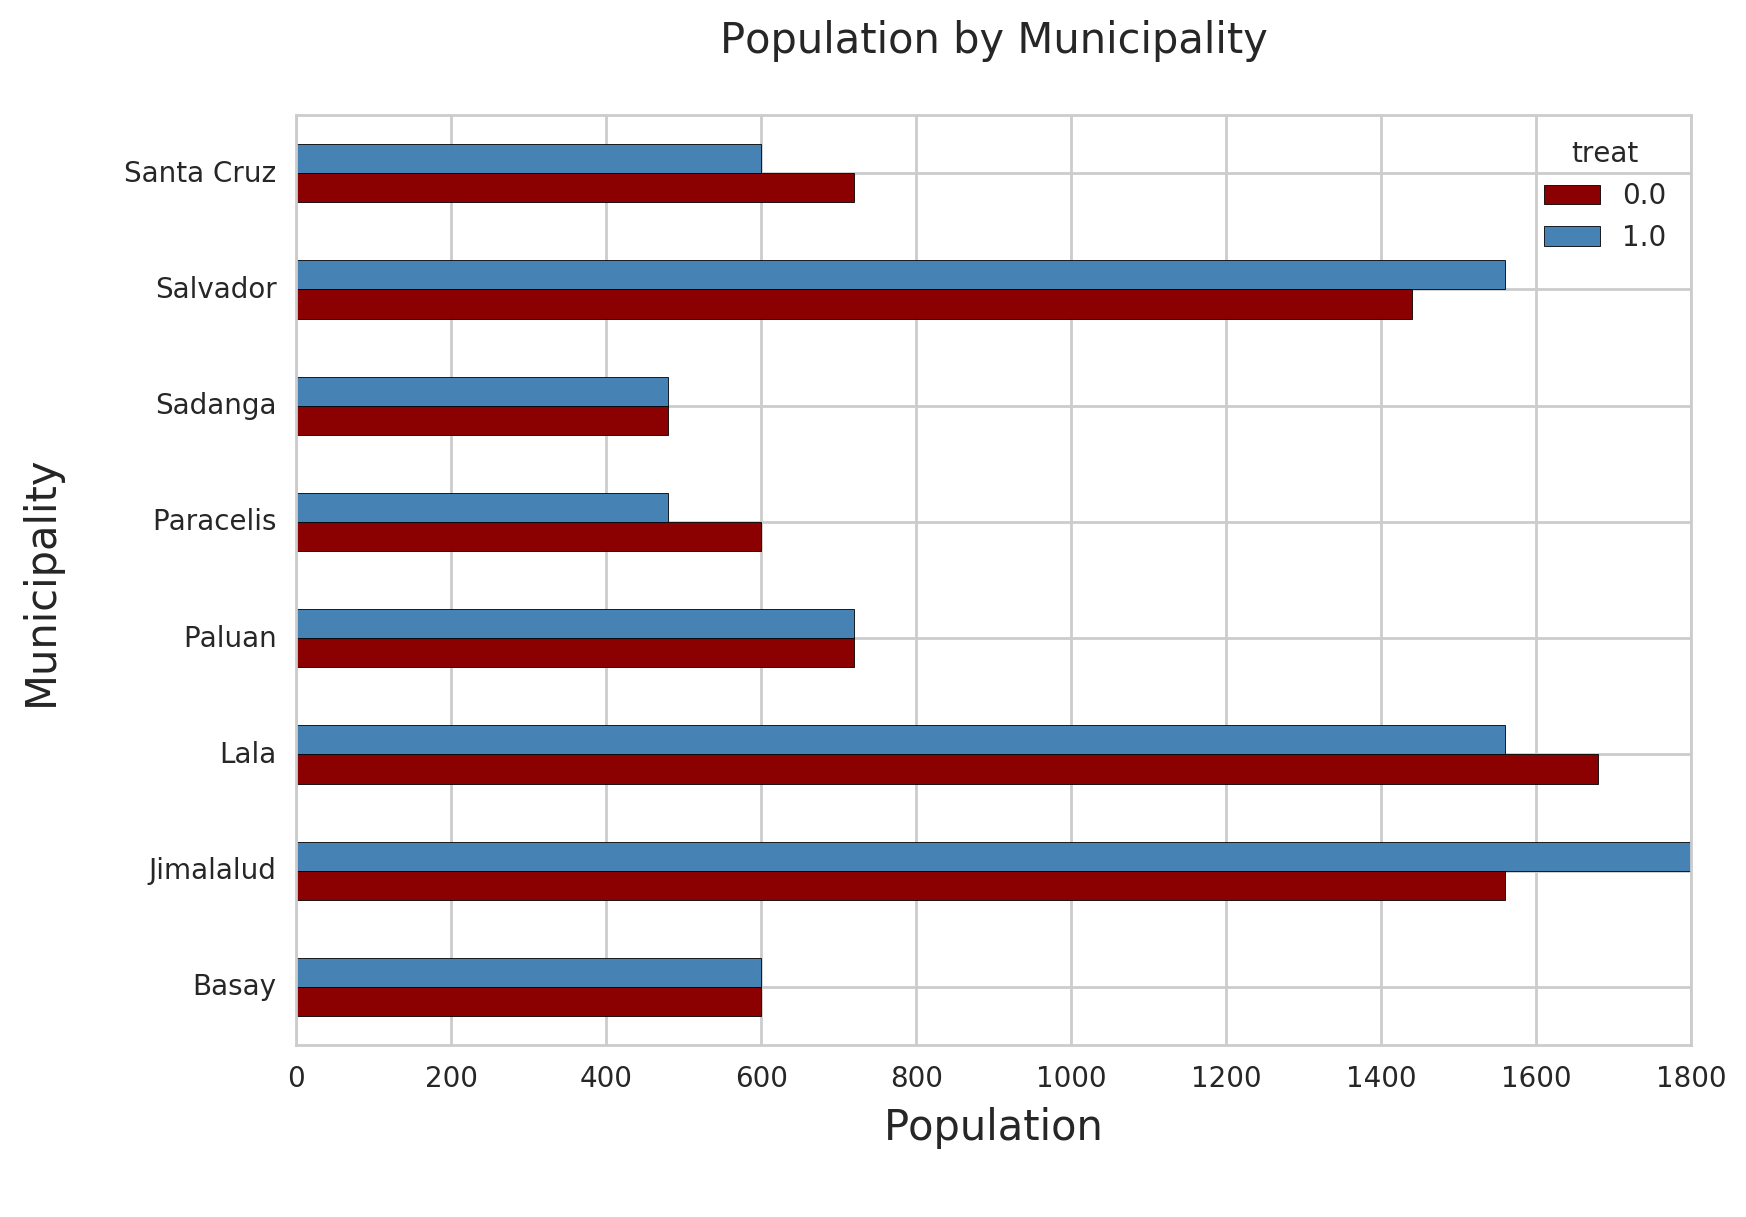

In [33]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
df.groupby(['municipality','treat']).size().unstack().plot( kind="barh", color=['darkred', 'steelblue'], ax=ax)
plt.title('Population by Municipality\n', fontsize = 15)
plt.ylabel('Municipality\n', fontsize=15)
plt.xlabel('Population\n', fontsize=15)
plt.show()


In [36]:
func_tuples = [('Median', np.mean), ('Variance', np.var), ('Standard Deviation', np.std)]
df.groupby(['treat'])[['pop00']].agg(func_tuples).reset_index()


treat        pop00                                 
              Median      Variance Standard Deviation
0   0.0  1419.492310  9.856279e+05         992.787964
1   1.0  1474.584595  2.202852e+06        1484.200928

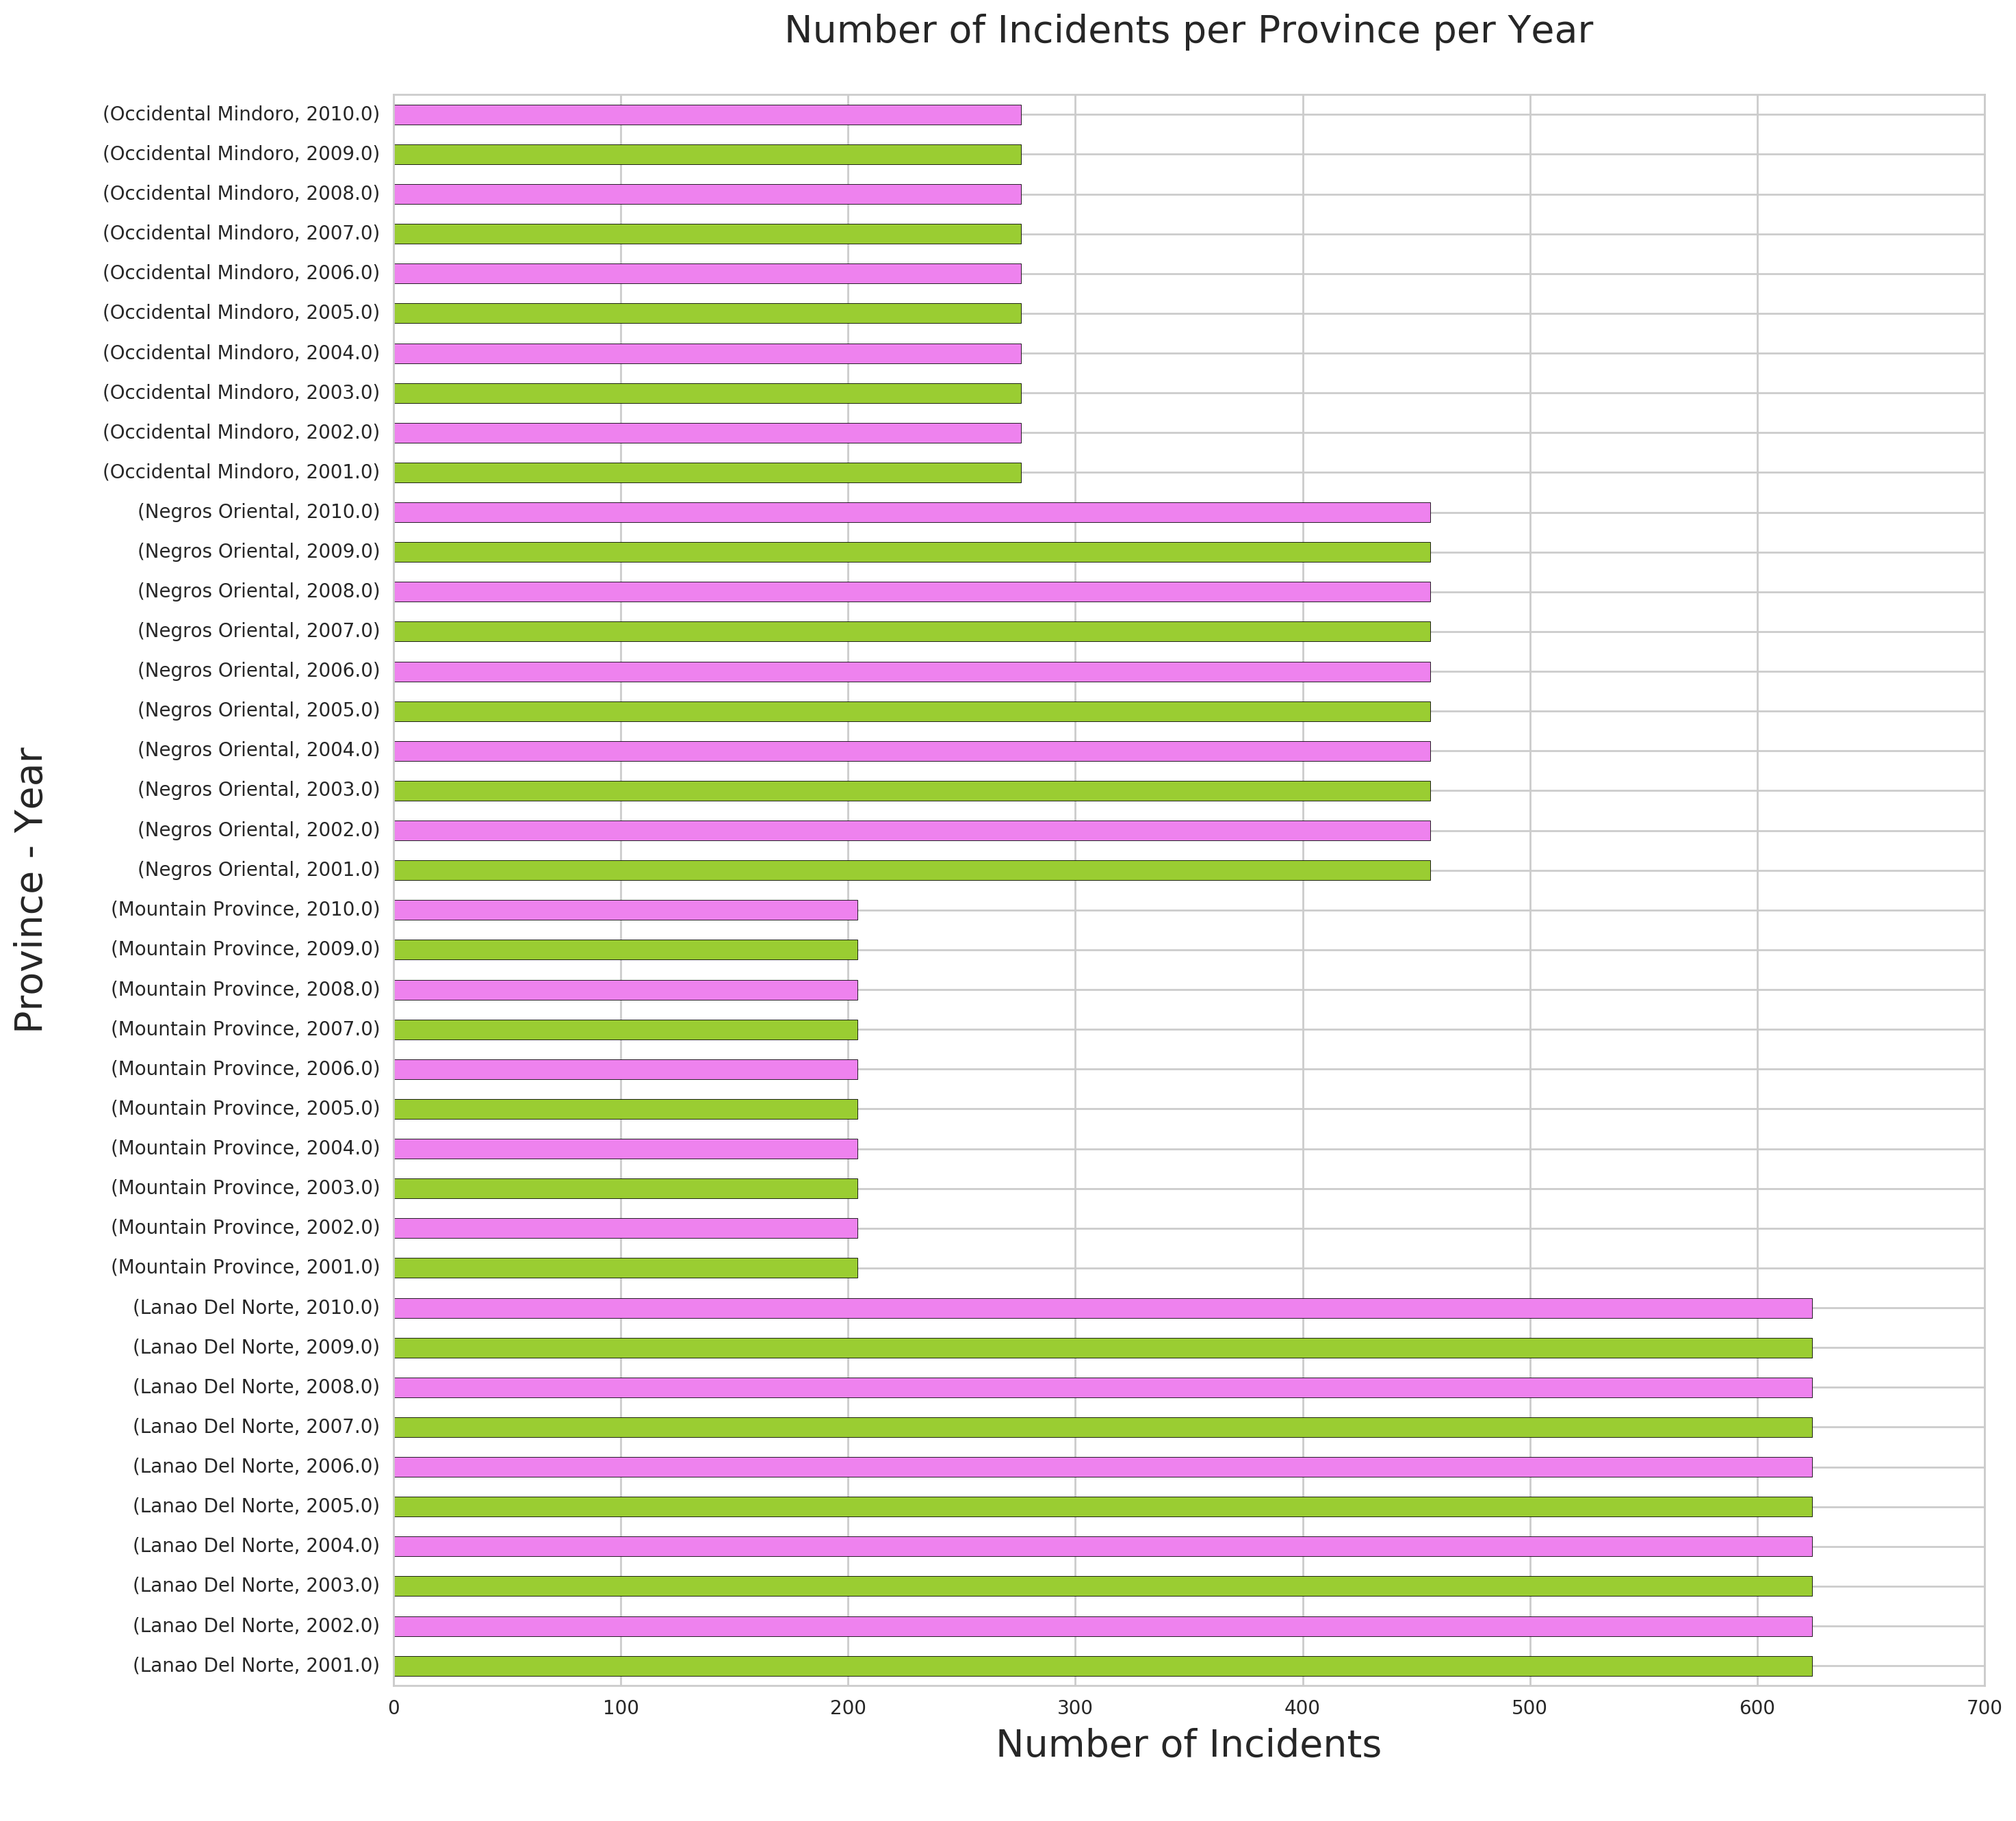

In [37]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.groupby(['province', 'year']).size().plot(kind="barh", colors=['yellowgreen', 'violet'], ax=ax)
plt.title('Number of Incidents per Province per Year\n', fontsize = 20)
plt.ylabel('Province - Year\n', fontsize=20)
plt.xlabel('Number of Incidents\n', fontsize=20)
plt.show()

In [38]:
from altair import *
from altair import Chart
Chart(df).mark_point().encode(
    x='pop00:Q',
    y='municipality:Q',
    color='year:N',
)

ImportError: No module named altair

In [39]:
Chart(df).mark_bar().encode(y='municipality', x='sum(incidents)', color='treat:N')


NameError: name 'Chart' is not defined

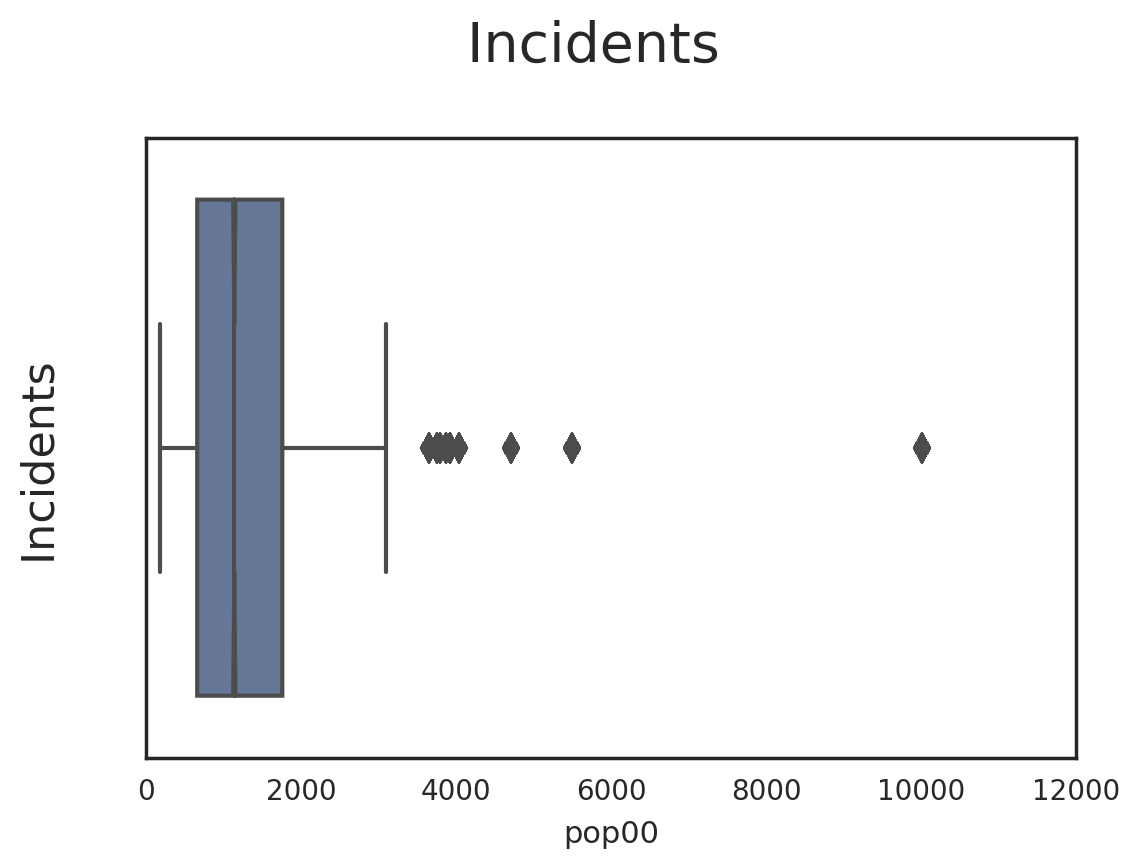

In [70]:
#Identifying outliers in the data
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
sns.boxplot(df.pop00   , orient='h',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)
ax.set_ylabel('Incidents  \n', fontsize=16)
ax.set_title('Incidents  \n', fontsize=20)
plt.show()


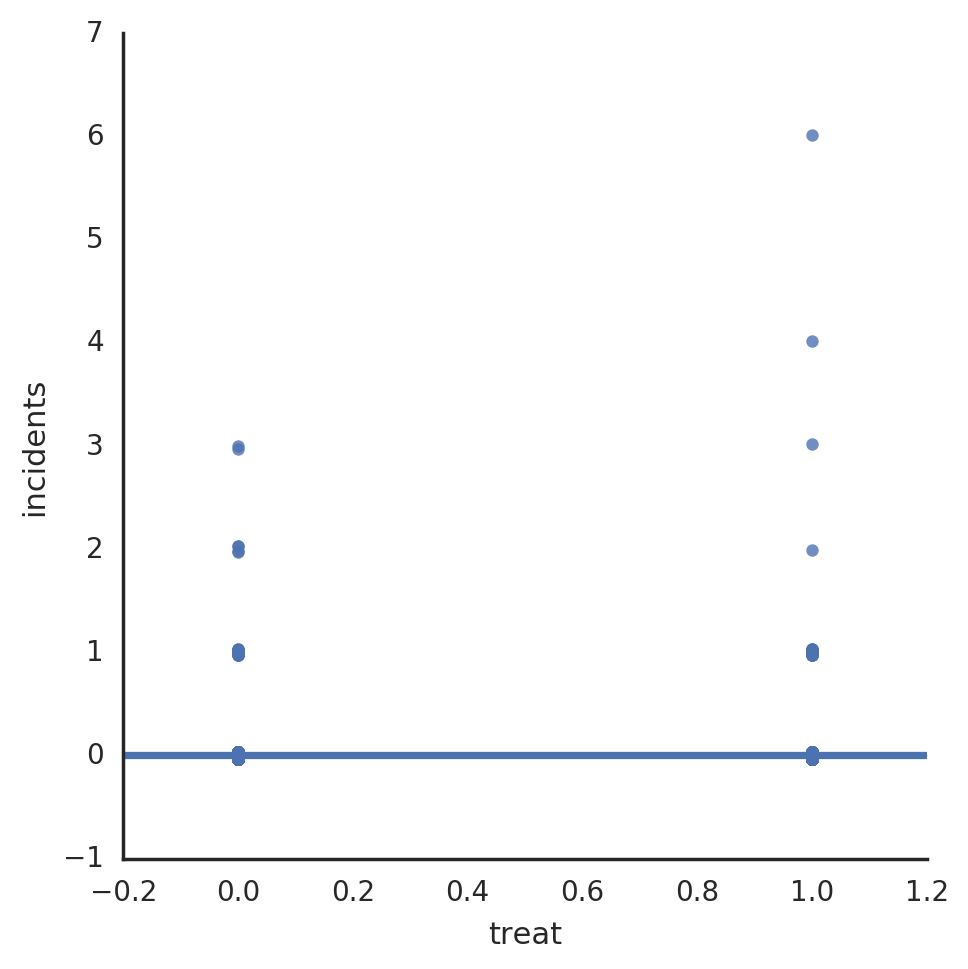

In [83]:
sns.lmplot(x="treat", y="incidents", data = df, y_jitter = .03)

In [ ]:
LinearRegression(fit_intercept=True, normalize=False, Copy_X=True, n)

In [88]:
# Load the diabetes dataset
pctc = datasets.load_df()

# Use only one feature
treat_X = pctc.data[:, np.newaxis, 2]

#treat_X = df.treat
incidents_y = pctc.incidents

# Split the data into training/testing sets
treat_X_train = treat_X[:-20]
treat_X_test = treat_X[-20:]

#diabetes_X_train = diabetes_X[:-20]
#diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
incidents_y_train = incidents_y[:-20]
incidnets_y_test = incidents_y[-20:]
#diabetes_y_train = diabetes.target[:-20]
#diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(treat_X_train, incidents_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error


NameError: name 'datasets' is not defined